# Quick Start


Started optimization using 1 process
Step 000000 [process00]: min infidelity = 5.651332e-01, converged = 0 / 1
Step 000020 [process00]: min infidelity = 1.328011e-01, converged = 0 / 1
Step 000040 [process00]: min infidelity = 6.036700e-02, converged = 0 / 1
Step 000060 [process00]: min infidelity = 2.136134e-02, converged = 0 / 1
Step 000080 [process00]: min infidelity = 3.057691e-03, converged = 0 / 1
Step 000100 [process00]: min infidelity = 6.383082e-05, converged = 0 / 1
Step 000120 [process00]: min infidelity = 1.702145e-05, converged = 0 / 1
Step 000140 [process00]: min infidelity = 5.909965e-06, converged = 0 / 1
Step 000160 [process00]: min infidelity = 4.324722e-08, converged = 0 / 1
Step 000180 [process00]: min infidelity = 6.582416e-08, converged = 0 / 1
Step 000200 [process00]: min infidelity = 6.341113e-09, converged = 0 / 1
Step 000210 [process00]: min infidelity = 7.566658e-11, converged = 1 / 1

=== Optimization finished using Adam ===

Duration: 3.326 seconds
Gates w

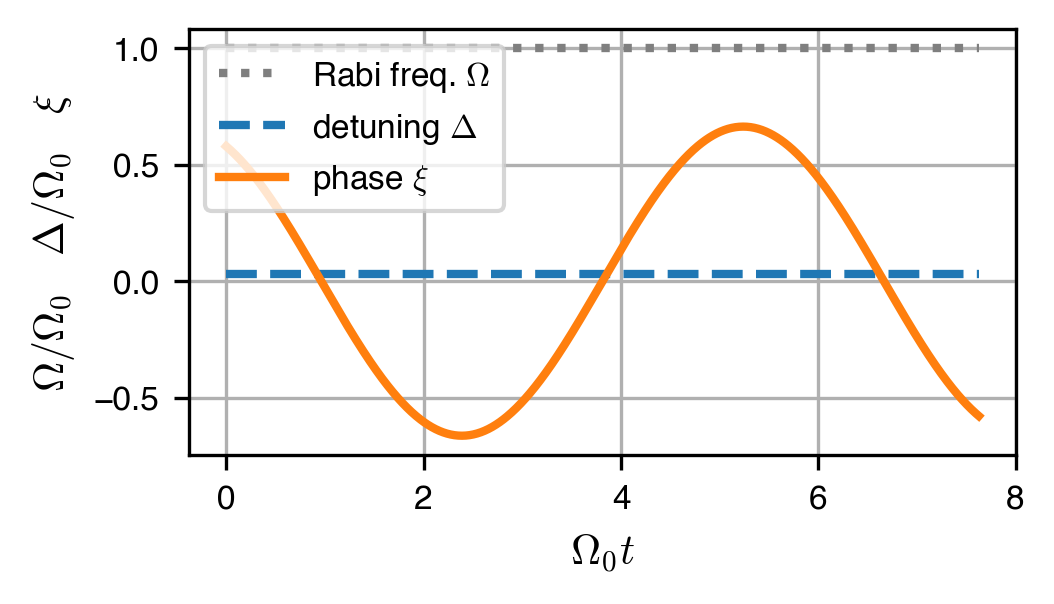

In [ ]:
%pip install -q rydopt

import rydopt as ro
import numpy as np

# Want to perform a CZ gate on two atoms in the perfect blockade regime; no Rydberg state decay
gate = ro.gates.TwoQubitGate(phi=None, theta=np.pi, Vnn=float("inf"), decay=0.0)

# Pulse ansatz: constant detuning, sweep of the laser phase according to sin_crab ansatz
pulse_ansatz = ro.pulses.PulseAnsatz(
    detuning_ansatz=ro.pulses.const, phase_ansatz=ro.pulses.sin_crab
)

# Initial pulse parameter guess
initial_params = (7.0, (0.0,), (0.0, 0.0), ())

# Optimize the pulse parameters
opt_result = ro.optimization.optimize(gate, pulse_ansatz, initial_params, tol=1e-10)
optimized_params = opt_result.params

# Plot the pulse
ro.characterization.plot_pulse(pulse_ansatz, optimized_params)